# Loan Application Status Prediction

### Problem Statement:

    This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 


#### Independent Variables:




- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area



#### Dependent Variable (Target Variable):



- Loan_Status



### Task

    Need to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Extracting data

data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [3]:
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
#Let's check number of rows
data.shape

(614, 13)

In [5]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [7]:
columns_with_nan = ["Gender", "Married", "Dependents","Self_Employed","LoanAmount","Loan_Amount_Term","Credit_History"]

In [8]:
for col in columns_with_nan:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


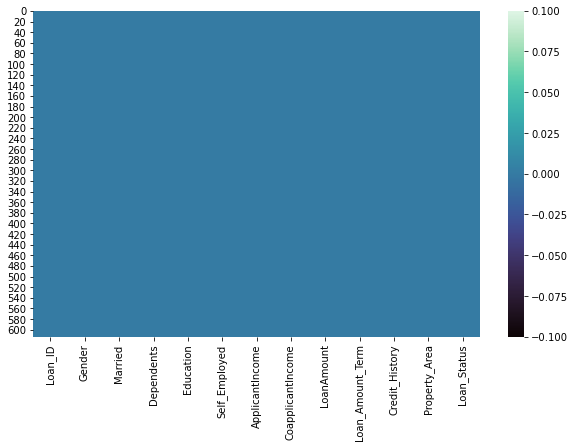

In [10]:
#Plot null values to check if any
plt.figure(figsize=(10,6))
sns.heatmap(data.isna(),cmap='mako')
plt.show()

    We rae left with no null values

In [11]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.465798,342.410423,0.855049
std,6109.041673,2926.248369,84.180967,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [12]:
data['CoapplicantIncome'].value_counts()

0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

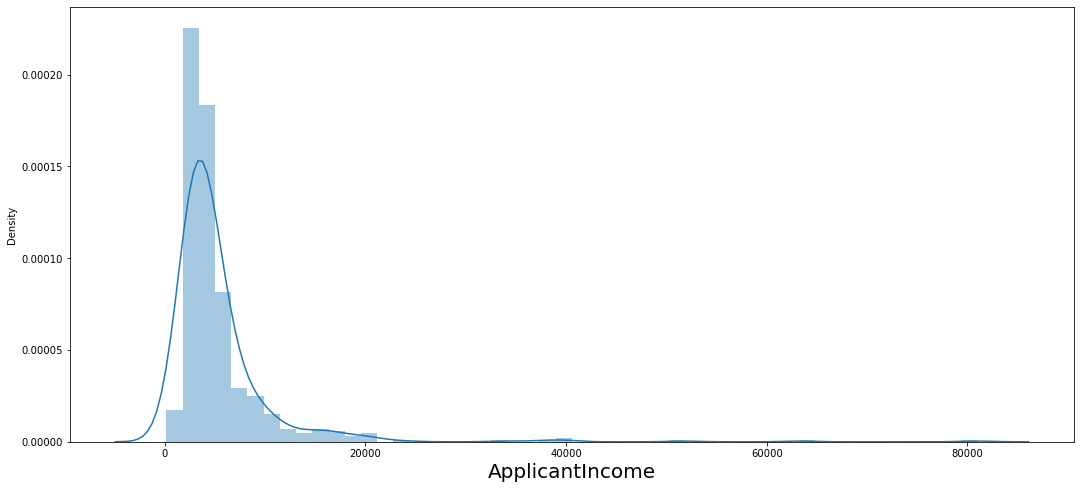

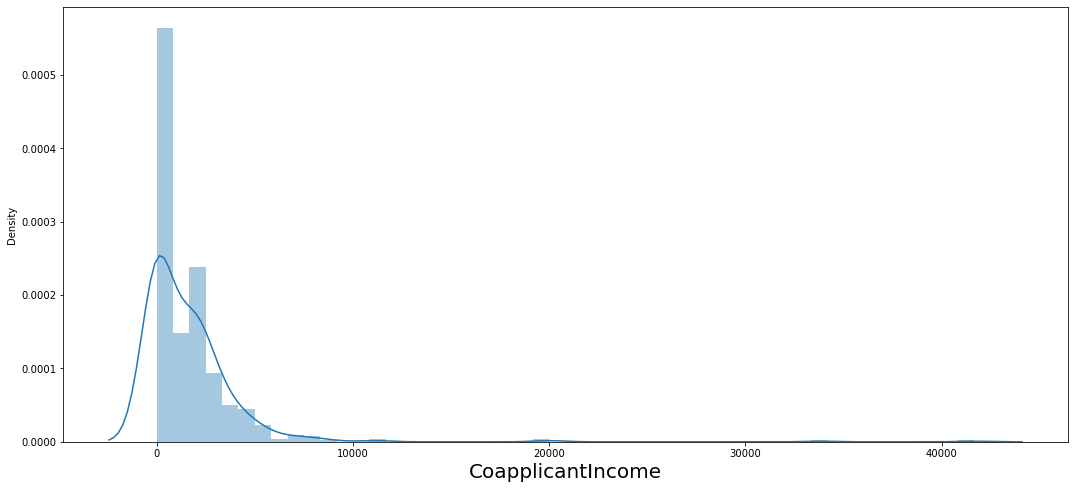

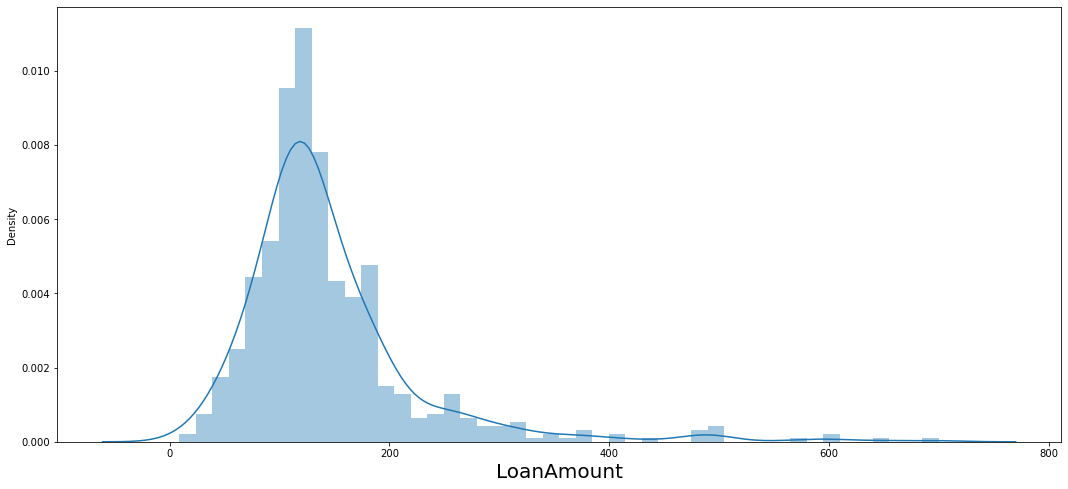

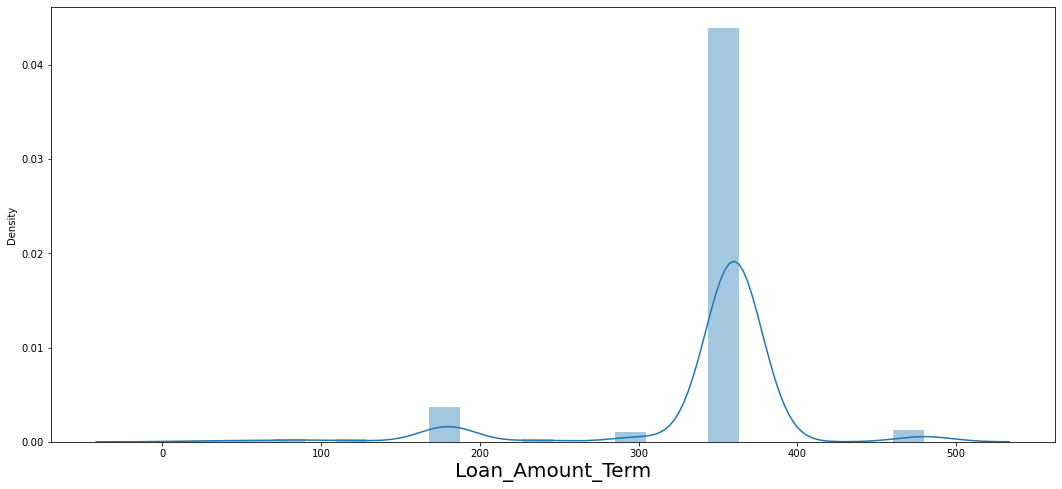

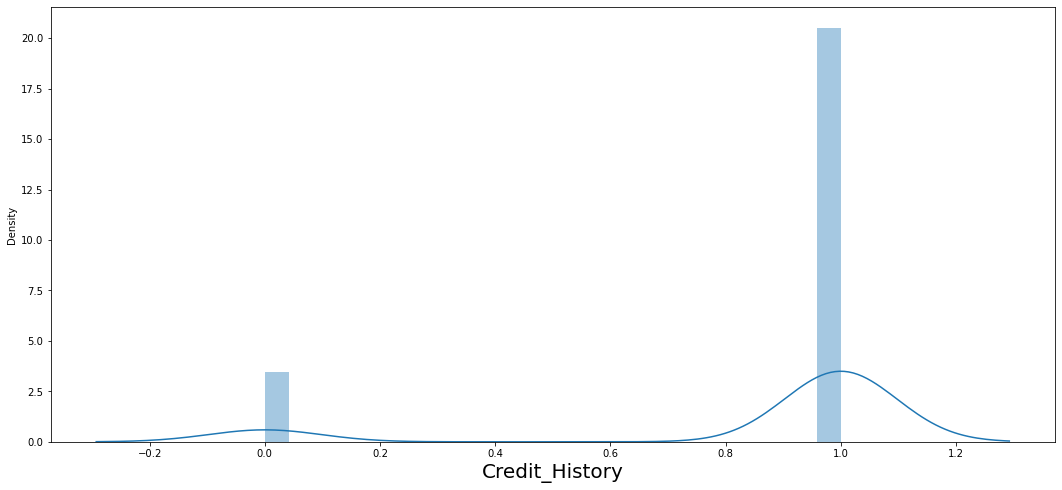

In [13]:

for i in data.columns:
    
    if data[i].dtype!='object':
        plt.figure(figsize=[18,8])
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=20)
    plt.show()

In [14]:
data.shape

(614, 13)

In [15]:
data = data.drop(columns='Loan_ID')

In [16]:
features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']  #columns with outliers


In [17]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [18]:
Q1 = data[features].quantile(0.25)
Q3 = data[features].quantile(0.75)
IQR = Q3-Q1

data_new1 = data[~((data[features] < (Q1-1.5*IQR)) | (data[features]> (Q3 + 1.5*Q3))).any(axis = 1)]

In [19]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",data.shape)
print('Shape After'.ljust(20),":",data_new1.shape)
print('Percentage Loss'.ljust(20),":",((data.shape[0]-data_new1.shape[0])/data.shape[0])*100)

Shape - Before and After:

Shape Before         : (614, 12)
Shape After          : (564, 12)
Percentage Loss      : 8.143322475570033


In [20]:
from scipy.stats import zscore  #importing zscore from library
features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']  #columns with outliers


z=np.abs(zscore(data[features]))
threshold = 3
data_new2 = data[(z<3).all(axis=1)]

In [21]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",data.shape)
print('Shape After'.ljust(20),":",data_new2.shape)
print('Percentage Loss'.ljust(20),":",((data.shape[0]-data_new2.shape[0])/data.shape[0])*100)

Shape - Before and After:

Shape Before         : (614, 12)
Shape After          : (589, 12)
Percentage Loss      : 4.071661237785016


In [22]:
data_new = data_new2.copy()

In [23]:
data_new['Loan_Amount_Term'].value_counts()

360.0    506
180.0     41
480.0     14
300.0     12
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [24]:
data.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.745407
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

In [25]:
data_new.skew()

ApplicantIncome      2.164762
CoapplicantIncome    1.353191
LoanAmount           1.126225
Loan_Amount_Term    -2.446026
Credit_History      -2.010069
dtype: float64

In [26]:

from sklearn.preprocessing import PowerTransformer #importing the library

scaler = PowerTransformer(method='yeo-johnson')
    
data_new['ApplicantIncome'] = scaler.fit_transform(data_new['ApplicantIncome'].values.reshape(-1,1))
data_new['CoapplicantIncome'] = scaler.fit_transform(data_new['CoapplicantIncome'].values.reshape(-1,1))
data_new['LoanAmount'] = scaler.fit_transform(data_new['LoanAmount'].values.reshape(-1,1))

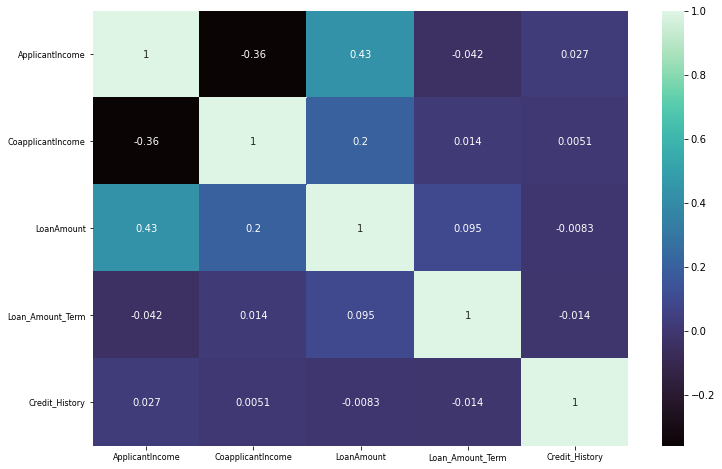

In [27]:
#Let's plot heatmap

plt.figure(figsize=(12,8))
sns.heatmap(data_new.corr(),annot=True,cmap='mako')
plt.tick_params(labelsize=8)

plt.show()

In [28]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [29]:
l1 = ['Gender', 'Married','Education','Loan_Status','Self_Employed']

In [30]:
#Let's use Label Encoder method

from sklearn.preprocessing import LabelEncoder  #importing library

le = LabelEncoder()  #calling function

for i in l1:
     if data_new[i].dtypes=='object':
            data_new[i]= le.fit_transform(data_new[i].values.reshape(-1,1))
data_new.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.688986,-1.119438,-0.140470,360.0,1.0,Urban,1
1,1,1,1,0,0,0.239843,0.748807,0.011197,360.0,1.0,Rural,0
2,1,1,0,0,1,-0.525799,-1.119438,-1.380101,360.0,1.0,Urban,1
3,1,1,0,1,0,-0.791841,0.899419,-0.140470,360.0,1.0,Urban,1
4,1,0,0,0,0,0.736280,-1.119438,0.245654,360.0,1.0,Urban,1


In [31]:
data_new['Property_Area'].value_counts()

Semiurban    222
Urban        194
Rural        173
Name: Property_Area, dtype: int64

In [32]:
#Get dummies
l2 = pd.get_dummies(data_new['Property_Area'])
l3 = pd.get_dummies(data_new['Dependents'])

#Concat with main dataframe by dropping workclass dataframe
data_new=pd.concat([data_new.drop('Property_Area',axis=1),l2],axis=1)
data_new=pd.concat([data_new.drop('Dependents',axis=1),l3],axis=1)

In [33]:
data_new.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban,0,1,2,3+
0,1,0,0,0,0.688986,-1.119438,-0.140470,360.0,1.0,1,0,0,1,1,0,0,0
1,1,1,0,0,0.239843,0.748807,0.011197,360.0,1.0,0,1,0,0,0,1,0,0
2,1,1,0,1,-0.525799,-1.119438,-1.380101,360.0,1.0,1,0,0,1,1,0,0,0
3,1,1,1,0,-0.791841,0.899419,-0.140470,360.0,1.0,1,0,0,1,1,0,0,0
4,1,0,0,0,0.736280,-1.119438,0.245654,360.0,1.0,1,0,0,1,1,0,0,0


In [34]:
data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

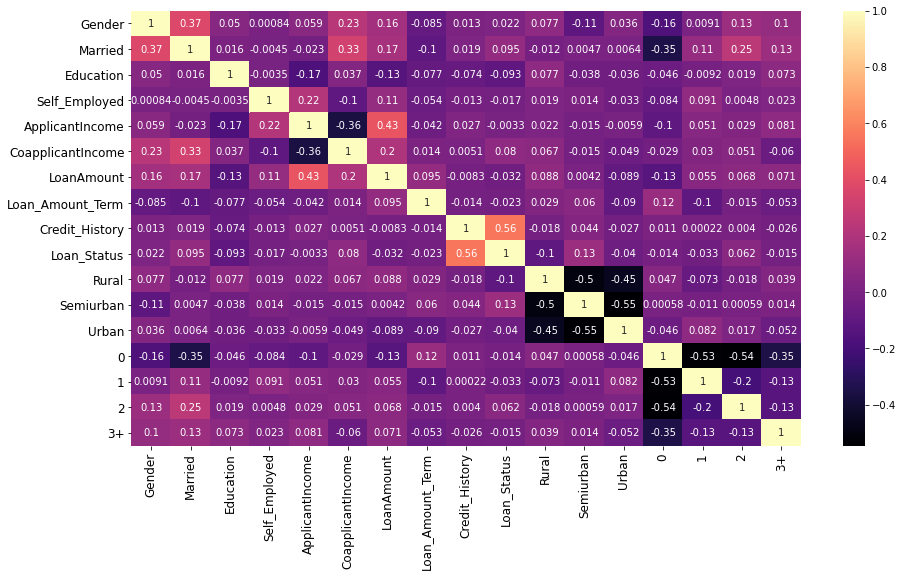

In [35]:
#Let's plot heatmap

plt.figure(figsize=(15,8))
sns.heatmap(data_new.corr(),annot=True,cmap='magma')
plt.tick_params(labelsize=12)

plt.show()

In [36]:
X = data_new.drop(columns = 'Loan_Status') #Features
Y = data_new['Loan_Status'] #Label

In [37]:
# Handiling the class having imbalance using SMOTE (Oversampling method)

from imblearn.over_sampling import SMOTE

sm=SMOTE()
X_over,Y_over = sm.fit_resample(X,Y)

In [38]:
round(Y_over.value_counts(normalize=True)*100,2).astype('str')+'%'

1    50.0%
0    50.0%
Name: Loan_Status, dtype: object

In [39]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

X_scaled = Scaler.fit_transform(X_over)

In [40]:
from sklearn.linear_model import LogisticRegression

maxAccuracy = 0
maxAcc = 0

for i in range(200):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y_over,test_size = 0.20,random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccuracy:
        maxAccuracy = acc
        maxAcc = i
        
print('The best accuracy is ',maxAccuracy, ' with Random State ',maxAcc)

The best accuracy is  0.8588957055214724  with Random State  17


In [41]:
#TrainTestSplit
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y_over,test_size = 0.20,random_state = maxAcc)

In [42]:
#Importing Libraries

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [43]:
Log_Reg = LogisticRegression()
Log_Reg.fit(x_train,y_train) #training the model
y_pred_log = Log_Reg.predict(x_test) #testing and predicting data

#Accuracy Score
print("Accuracy Score:",accuracy_score(y_test,y_pred_log))
A1 = accuracy_score(y_test,y_pred_log)

#Cross Validation Score
print("Cross Validation Score: ", cross_val_score(Log_Reg,X_scaled,Y_over,cv=5))
print('Avg_Cross_Validation Score: ',cross_val_score(Log_Reg,X_scaled,Y_over,cv=5).mean())
CV1 = cross_val_score(Log_Reg,X_scaled,Y_over,cv=5).mean()

Accuracy Score: 0.8588957055214724
Cross Validation Score:  [0.70552147 0.71779141 0.79754601 0.88343558 0.84567901]
Avg_Cross_Validation Score:  0.7899946981746572


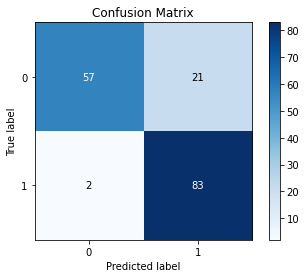

              precision    recall  f1-score   support

           0       0.97      0.73      0.83        78
           1       0.80      0.98      0.88        85

    accuracy                           0.86       163
   macro avg       0.88      0.85      0.86       163
weighted avg       0.88      0.86      0.86       163



In [44]:
#Confusion_matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,y_pred_log)
plt.show()

#classification_report
print(classification_report(y_test,y_pred_log))

In [45]:
Rand2 = RandomForestClassifier()
Rand2.fit(x_train,y_train) #training the model
y_pred_rand2 = Rand2.predict(x_test) #testing and predicting data

#Accuracy Score
A2 = accuracy_score(y_test,y_pred_rand2)

#Cross Validation Score
CV2 = cross_val_score(Rand2,X_scaled,Y_over,cv=5).mean()

In [46]:
#Accuracy Score
print("Accuracy Score:",A2)

#Cross Validation Score
print("Cross Validation Score: ", cross_val_score(Rand2,X_scaled,Y_over,cv=5))
print('Avg_Cross_Validation Score: ',CV2)

Accuracy Score: 0.8588957055214724
Cross Validation Score:  [0.7607362  0.74233129 0.85889571 0.86503067 0.87654321]
Avg_Cross_Validation Score:  0.8207074149814437


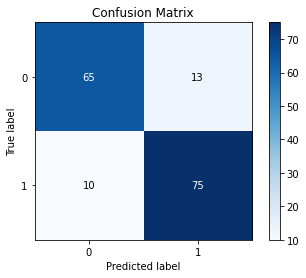

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        78
           1       0.85      0.88      0.87        85

    accuracy                           0.86       163
   macro avg       0.86      0.86      0.86       163
weighted avg       0.86      0.86      0.86       163



In [47]:
#confusion_matrix
skplt.metrics.plot_confusion_matrix(y_test,y_pred_rand2)
plt.show()

#classification_report
print(classification_report(y_test,y_pred_rand2))

In [48]:
dt = DecisionTreeClassifier() #calling the model
dt.fit(x_train,y_train) #training the model
y_pred_dt = dt.predict(x_test) #testing and predicting data

#Accuracy Score
A3 = accuracy_score(y_test,y_pred_dt)
print("Accuracy Score:",A3)


#Cross Validation Score
print("Cross Validation Score: ", cross_val_score(dt,X_scaled,Y_over,cv=5))
CV3 = cross_val_score(dt,X_scaled,Y_over,cv=5).mean()
print('Avg_Cross_Validation Score: ',CV3)

Accuracy Score: 0.7852760736196319
Cross Validation Score:  [0.73006135 0.6809816  0.7607362  0.82208589 0.83333333]
Avg_Cross_Validation Score:  0.7789366053169735


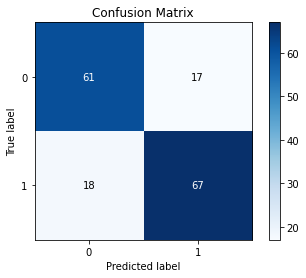

              precision    recall  f1-score   support

           0       0.77      0.78      0.78        78
           1       0.80      0.79      0.79        85

    accuracy                           0.79       163
   macro avg       0.78      0.79      0.78       163
weighted avg       0.79      0.79      0.79       163



In [49]:
#confusion_matrix
skplt.metrics.plot_confusion_matrix(y_test,y_pred_dt)
plt.show()

#classification_report
print(classification_report(y_test,y_pred_dt))

In [50]:
knn=KNeighborsClassifier() #calling the model
knn.fit(x_train,y_train) #training the model
y_pred_knn = knn.predict(x_test) #testing and predicting data

#Accuracy Score
A4 = accuracy_score(y_test,y_pred_knn)
print("Acicuracy Score:",A4)

#Cross Validation Score
print("Cross Validation Score: ", cross_val_score(knn,X_scaled,Y_over,cv=5))
CV4 = cross_val_score(knn,X_scaled,Y_over,cv=5).mean()
print('Avg_Cross_Validation Score: ',CV4)

Acicuracy Score: 0.7852760736196319
Cross Validation Score:  [0.71165644 0.6993865  0.72392638 0.7791411  0.74074074]
Avg_Cross_Validation Score:  0.7309702340377188


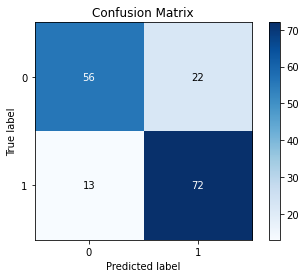

              precision    recall  f1-score   support

           0       0.81      0.72      0.76        78
           1       0.77      0.85      0.80        85

    accuracy                           0.79       163
   macro avg       0.79      0.78      0.78       163
weighted avg       0.79      0.79      0.78       163



In [51]:
#confusion_matrix
skplt.metrics.plot_confusion_matrix(y_test,y_pred_knn)
plt.show()

#classification_report
print(classification_report(y_test,y_pred_knn))

In [52]:
from sklearn.ensemble import AdaBoostClassifier

adb= AdaBoostClassifier(n_estimators=10) #calling the model
adb.fit(x_train,y_train)
y_pred_adb = adb.predict(x_test)

#Accuracy Score
A5 = accuracy_score(y_test,y_pred_adb)
print("Accuracy Score:",A5)

#Cross Validation Score
print("Cross Validation Score: ", cross_val_score(adb,X_scaled,Y_over,cv=5))
CV5 = cross_val_score(adb,X_scaled,Y_over,cv=5).mean()
print('Avg_Cross_Validation Score: ',CV5)


Accuracy Score: 0.8220858895705522
Cross Validation Score:  [0.68711656 0.73006135 0.78527607 0.79754601 0.82098765]
Avg_Cross_Validation Score:  0.7641975308641975


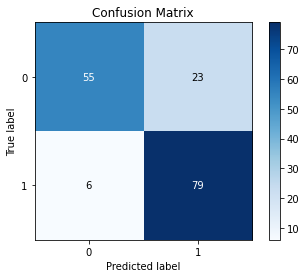

              precision    recall  f1-score   support

           0       0.90      0.71      0.79        78
           1       0.77      0.93      0.84        85

    accuracy                           0.82       163
   macro avg       0.84      0.82      0.82       163
weighted avg       0.84      0.82      0.82       163



In [53]:
#confusion_matrix
skplt.metrics.plot_confusion_matrix(y_test,y_pred_adb)
plt.show()

#classification_report
print(classification_report(y_test,y_pred_adb))

In [54]:
from sklearn.svm import SVC

sv=SVC() #calling the model
sv.fit(x_train,y_train) #training the model
y_pred_sv = sv.predict(x_test) #testing and predicting data

#Accuracy Score
A6 = accuracy_score(y_test,y_pred_sv)
print("Accuracy Score:",A6)

#Cross Validation Score
print("Cross Validation Score: ", cross_val_score(sv,X_scaled,Y_over,cv=5))
CV6 = cross_val_score(sv,X_scaled,Y_over,cv=5).mean()
print('Avg_Cross_Validation Score: ',CV6)


Accuracy Score: 0.803680981595092
Cross Validation Score:  [0.69325153 0.66871166 0.80368098 0.83435583 0.80864198]
Avg_Cross_Validation Score:  0.7617283950617285


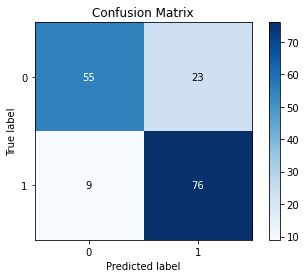

              precision    recall  f1-score   support

           0       0.86      0.71      0.77        78
           1       0.77      0.89      0.83        85

    accuracy                           0.80       163
   macro avg       0.81      0.80      0.80       163
weighted avg       0.81      0.80      0.80       163



In [55]:
#confusion_matrix
skplt.metrics.plot_confusion_matrix(y_test,y_pred_sv)
plt.show()

#classification_report
print(classification_report(y_test,y_pred_sv))

### Model7: BernoulliNB

In [56]:
from sklearn.naive_bayes import BernoulliNB

nb=BernoulliNB() #calling the model
nb.fit(x_train,y_train) #training the model
y_pred_nb = nb.predict(x_test) #testing and predicting data

#Accuracy Score
A7 = accuracy_score(y_test,y_pred_nb)
print("Accuracy Score:",A7)

#Cross Validation Score
print("Cross Validation Score: ", cross_val_score(nb,X_scaled,Y_over,cv=5))
CV7 = cross_val_score(nb,X_scaled,Y_over,cv=5).mean()
print('Avg_Cross_Validation Score: ',CV7)

Accuracy Score: 0.803680981595092
Cross Validation Score:  [0.70552147 0.70552147 0.73619632 0.80368098 0.77777778]
Avg_Cross_Validation Score:  0.7457396046353102


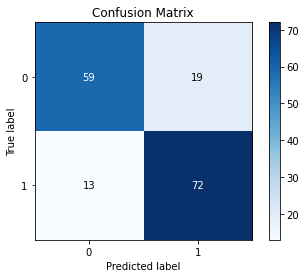

              precision    recall  f1-score   support

           0       0.82      0.76      0.79        78
           1       0.79      0.85      0.82        85

    accuracy                           0.80       163
   macro avg       0.81      0.80      0.80       163
weighted avg       0.80      0.80      0.80       163



In [57]:
#confusion_matrix
skplt.metrics.plot_confusion_matrix(y_test,y_pred_nb)
plt.show()

#classification_report
print(classification_report(y_test,y_pred_nb))

In [58]:
Overall_Score = pd.DataFrame({'Model':['Logistic Regression','Random Forest Classifier','Decision Tree',
                                       'KNeighbors Classifier','AdaBoost Classifier','SVC','BernoulliNB Classifier'],
                              'Accuracy_Score':[A1,A2,A3,A4,A5,A6,A7],
                              'Cross_Validation_Score':[CV1,CV2,CV3,CV4,CV5,CV6,CV7]})


Overall_Score['Difference'] = Overall_Score['Accuracy_Score'] - Overall_Score['Cross_Validation_Score']

In [59]:
Overall_Score

,Model,Accuracy_Score,Cross_Validation_Score,Difference
0,Logistic Regression,0.858896,0.789995,0.068901
1,Random Forest Classifier,0.858896,0.820707,0.038188
2,Decision Tree,0.785276,0.778937,0.006339
3,KNeighbors Classifier,0.785276,0.730970,0.054306
4,AdaBoost Classifier,0.822086,0.764198,0.057888
5,SVC,0.803681,0.761728,0.041953
6,BernoulliNB Classifier,0.803681,0.745740,0.057941


In [61]:
Overall_Score['Difference'].min()

0.006339468302658413

In [62]:
Overall_Score[Overall_Score['Difference']==0.006339468302658413]

,Model,Accuracy_Score,Cross_Validation_Score,Difference
2,Decision Tree,0.785276,0.778937,0.006339


## Hyper Parameter Tuning

In [84]:
#Importing library
from sklearn.model_selection import GridSearchCV


param_grid={'max_features':['auto','sqrt'],'min_samples_leaf':range(10),'splitter':['best','rand'],
           'min_weight_fraction_leaf':[0.0,0.1],'min_samples_split':range(8),'criterion':['gini']}

gridsearch=GridSearchCV(estimator=dt,param_grid=param_grid,cv=5)

gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': range(0, 10),
                         'min_samples_split': range(0, 8),
                         'min_weight_fraction_leaf': [0.0, 0.1],
                         'splitter': ['best', 'rand']})

In [85]:
print(gridsearch.best_score_, gridsearch.best_params_)

0.7557956547269524 {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'}


In [86]:
DT = DecisionTreeClassifier(criterion = 'gini', max_features = 'auto', min_samples_leaf = 1, 
                            min_samples_split= 6, min_weight_fraction_leaf= 0.0, splitter = 'best')

DT.fit(x_train,y_train)
y_pred = DT.predict(x_test)

## Saving the model for future prediction:


In [93]:
import joblib
joblib.dump(DT,'Loan_Application_Status_Prediction.obj')

['Loan_Application_Status_Prediction.obj']

In [87]:
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Cross Validation Score: ", cross_val_score(DT,X_scaled,Y_over,cv=5))
print('Avg_Cross_Validation Score: ',cross_val_score(DT,X_scaled,Y_over,cv=5).mean())

Accuracy Score: 0.8098159509202454
Cross Validation Score:  [0.71779141 0.65030675 0.76687117 0.7607362  0.77777778]
Avg_Cross_Validation Score:  0.7174733015223813



Confusion Matrix


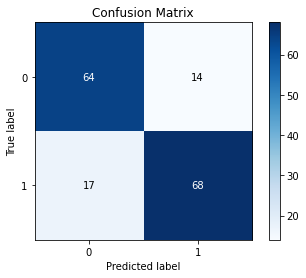

In [88]:
print('\nConfusion Matrix')
skplt.metrics.plot_confusion_matrix(y_test,y_pred)
plt.show()

In [89]:
print('\nClassification Report:\n\n',classification_report(y_test,y_pred))


Classification Report:

               precision    recall  f1-score   support

           0       0.79      0.82      0.81        78
           1       0.83      0.80      0.81        85

    accuracy                           0.81       163
   macro avg       0.81      0.81      0.81       163
weighted avg       0.81      0.81      0.81       163




Precision Recall Curve




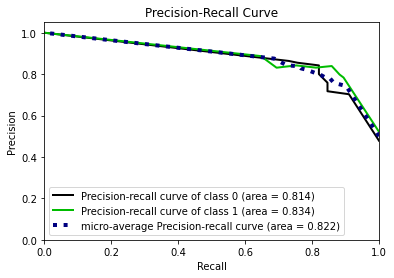

In [90]:

import matplotlib.pyplot as plt
import scikitplot as skplt
# This is a decisiontree classifier after tuning. We'll generate probabilities on the test set.
DT.fit(x_train, y_train)
probas = DT.predict_proba(x_test)

print('\nPrecision Recall Curve\n\n')
# Now plot.
skplt.metrics.plot_precision_recall_curve(y_test, probas)

plt.show()


ROC Curve




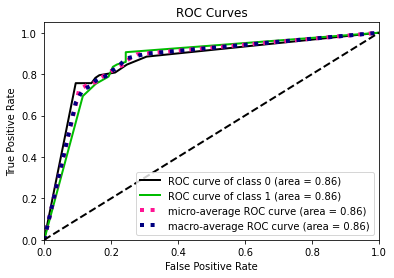

In [91]:
import matplotlib.pyplot as plt
import scikitplot as skplt
# This is a decisiontree classifier. We'll generate probabilities on the test set.
DT.fit(x_train, y_train)
probas = DT.predict_proba(x_test)

print('\nROC Curve\n\n')
# Now plot.
skplt.metrics.plot_roc(y_test, probas)

plt.show()

In [95]:
loaded_model = joblib.load(open('Loan_Application_Status_Prediction.obj','rb'))

In [97]:
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = loaded_model.score(x_test,y_test) 

# Print the Score
print("Test score: {0:.2f} %".format(100 * score))

# Predict the Labels using the reloaded Model
Predictions = loaded_model.predict(x_test)

Predictions

Test score: 79.75 %


array([0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0])

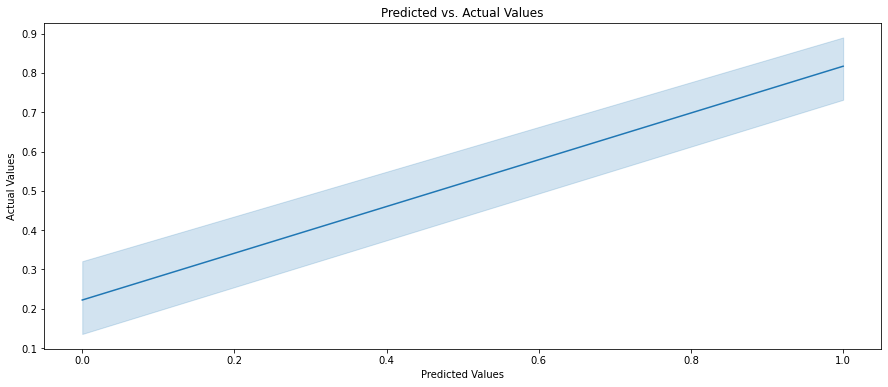

In [99]:

#plot predicted vs. actual values
plt.figure(figsize=[15,6])
sns.lineplot(x=Predictions, y=y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs. Actual Values')
plt.show()

In [102]:
#create data frame of actual and predicted values

list_of_tuples = list(zip(y_test, Predictions))
Result = pd.DataFrame(list_of_tuples,
                  columns = ['Actual', 'Predicted'])

In [104]:
pd.set_option('display.max_rows', None)

Result

,Actual,Predicted
0,0,0
1,1,1
2,0,1
3,1,1
4,1,0
5,0,0
6,0,0
7,1,1
8,1,0
9,1,0
